<a href="https://colab.research.google.com/github/jessicawaters/Project-1/blob/main/PROJECT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1:

# Analysis of Spongebob Episodes: Viewership and Characteristics

## Objective and Data Overview

To explore factors that influence viewership and understand how characteristics like guest appearances and episode length relate to audience numbers.

The project uses a dataset of SpongeBob episodes with columns like 'Airdate,' 'U.S. viewers (millions),' 'Sister episode count,' 'Running time,' 'Guest(s),' and 'animation.' These columns are mainly analyzed for relationships to viewership metrics.

## Import Libraries and Load Text

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://github.com/jessicawaters/Project-1/raw/refs/heads/main/spongebob_episodes.csv")

In [4]:
df.shape

(583, 25)

In [5]:
df.head()

,Airdate,Animation,Animation Supervisor,Copyright year,Creative,Episode №,Guest(s),Line Producer,Main,Next,...,Storyboard,Storyboard Artist(s),Supervising,Supervising Producer(s),Technical,U.S. premiere time (ET),U.S. viewers (millions),Writer(s),characters,title
0,1997/1998,Alan Smart,NaN,"['1997 (1997 version)', '1999 (1999 version)']",Derek Drymon (uncredited),1a,NaN,NaN,NaN,"""Reef Blower""",...,Stephen Hillenburg,Derek Drymon,NaN,NaN,NaN,9:30 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","French Narrator, Sea urchins, SpongeBob Square...",Help Wanted
1,"May 1, 1999","['Fred Miller', 'Tom Yasumi (uncredited)']",NaN,1999,Derek Drymon (uncredited),1b,NaN,NaN,NaN,"""Tea at the Treedome""",...,Paul Tibbitt (uncredited),Jay Lender (uncredited),NaN,NaN,NaN,9:38 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","SpongeBob SquarePants, Squidward Tentacles, Re...",Reef Blower
2,"May 1, 1999",Tom Yasumi,NaN,1999,Derek Drymon,1c,NaN,NaN,NaN,"""Bubblestand""",...,Paul Tibbitt,Mark O'Hare,NaN,NaN,NaN,9:45 pm,2.96,"['Peter Burns', 'Doug Lawrence', 'Paul Tibbitt']","SpongeBob SquarePants, Jellyfish, Lavender jel...",Tea at the Treedome
3,"July 17, 1999",Tom Yasumi,NaN,1999,Derek Drymon,2a,NaN,NaN,NaN,"""Ripped Pants""",...,Ennio Torresan,Erik Wiese,NaN,NaN,NaN,10:00 am,2.51,"['Ennio Torresan', 'Erik Wiese', 'Stephen Hill...","SpongeBob SquarePants, Scallop, Squidward Tent...",Bubblestand
4,"July 17, 1999",Edgar Larrazábal,NaN,1999,Derek Drymon,2b,Jay Lender as Chef (uncredited),NaN,NaN,"""Jellyfishing""",...,Paul Tibbitt,Mark O'Hare,NaN,NaN,NaN,10:15 am,2.51,"['Paul Tibbitt', 'Peter Burns']","French Narrator, SpongeBob SquarePants, Sponge...",Ripped Pants


Tweaking the column names

In [6]:
df.columns

Index(['Airdate', 'Animation', 'Animation Supervisor', 'Copyright year',
       'Creative', 'Episode №', 'Guest(s)', 'Line Producer', 'Main', 'Next',
       'Previous', 'Production code', 'Running time', 'Season №',
       'Sister episode(s)', 'Storyboard', 'Storyboard Artist(s)',
       'Supervising', 'Supervising Producer(s)', 'Technical',
       'U.S. premiere time (ET)', 'U.S. viewers (millions)', 'Writer(s)',
       'characters', 'title'],
      dtype='object')

In [7]:
df.columns=[col.lower().replace(' ', '_') for col in df.columns]
df.columns

Index(['airdate', 'animation', 'animation_supervisor', 'copyright_year',
       'creative', 'episode_№', 'guest(s)', 'line_producer', 'main', 'next',
       'previous', 'production_code', 'running_time', 'season_№',
       'sister_episode(s)', 'storyboard', 'storyboard_artist(s)',
       'supervising', 'supervising_producer(s)', 'technical',
       'u.s._premiere_time_(et)', 'u.s._viewers_(millions)', 'writer(s)',
       'characters', 'title'],
      dtype='object')

Checking for null values

In [8]:
for col in df.columns:
    print(col, df[col].isnull().sum())

airdate 0
animation 14
animation_supervisor 581
copyright_year 0
creative 254
episode_№ 0
guest(s) 393
line_producer 515
main 562
next 0
previous 1
production_code 0
running_time 0
season_№ 0
sister_episode(s) 31
storyboard 106
storyboard_artist(s) 373
supervising 355
supervising_producer(s) 126
technical 544
u.s._premiere_time_(et) 1
u.s._viewers_(millions) 1
writer(s) 2
characters 0
title 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   airdate                  583 non-null    object
 1   animation                569 non-null    object
 2   animation_supervisor     2 non-null      object
 3   copyright_year           583 non-null    object
 4   creative                 329 non-null    object
 5   episode_№                583 non-null    object
 6   guest(s)                 190 non-null    object
 7   line_producer            68 non-null     object
 8   main                     21 non-null     object
 9   next                     583 non-null    object
 10  previous                 582 non-null    object
 11  production_code          583 non-null    object
 12  running_time             583 non-null    object
 13  season_№                 583 non-null    int64 
 14  sister_episode(s)        552 non-null    o

In [10]:
# I will be focusing on these varaibles in my dataset
columns_of_interest = ['season_№', 'running_time', 'airdate', 'u.s._viewers_(millions)', 'sister_episode(s)', 'guest(s)', 'animation']
df[columns_of_interest].head()

,season_№,running_time,airdate,u.s._viewers_(millions),sister_episode(s),guest(s),animation
0,1,"8 minutes, 16 seconds",1997/1998,2.96,"['""Reef Blower""', '""Tea at the Treedome""']",NaN,Alan Smart
1,1,"2 minutes, 50 seconds","May 1, 1999",2.96,"['""Help Wanted""', '""Tea at the Treedome""']",NaN,"['Fred Miller', 'Tom Yasumi (uncredited)']"
2,1,11 minutes,"May 1, 1999",2.96,"['""Help Wanted""', '""Reef Blower""']",NaN,Tom Yasumi
3,1,"11 minutes, 4 seconds","July 17, 1999",2.51,"""Ripped Pants""",NaN,Tom Yasumi
4,1,"11 minutes, 2 seconds","July 17, 1999",2.51,"""Bubblestand""",Jay Lender as Chef (uncredited),Edgar Larrazábal


## Data Cleaning

### Clean the U.S. Viewership:

In [11]:
# rename U.S._Viewers_(milliions) to 'viewership'
df.rename(columns={'u.s._viewers_(millions)': 'viewership'}, inplace=True)
df.head(5)

,airdate,animation,animation_supervisor,copyright_year,creative,episode_№,guest(s),line_producer,main,next,...,storyboard,storyboard_artist(s),supervising,supervising_producer(s),technical,u.s._premiere_time_(et),viewership,writer(s),characters,title
0,1997/1998,Alan Smart,NaN,"['1997 (1997 version)', '1999 (1999 version)']",Derek Drymon (uncredited),1a,NaN,NaN,NaN,"""Reef Blower""",...,Stephen Hillenburg,Derek Drymon,NaN,NaN,NaN,9:30 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","French Narrator, Sea urchins, SpongeBob Square...",Help Wanted
1,"May 1, 1999","['Fred Miller', 'Tom Yasumi (uncredited)']",NaN,1999,Derek Drymon (uncredited),1b,NaN,NaN,NaN,"""Tea at the Treedome""",...,Paul Tibbitt (uncredited),Jay Lender (uncredited),NaN,NaN,NaN,9:38 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","SpongeBob SquarePants, Squidward Tentacles, Re...",Reef Blower
2,"May 1, 1999",Tom Yasumi,NaN,1999,Derek Drymon,1c,NaN,NaN,NaN,"""Bubblestand""",...,Paul Tibbitt,Mark O'Hare,NaN,NaN,NaN,9:45 pm,2.96,"['Peter Burns', 'Doug Lawrence', 'Paul Tibbitt']","SpongeBob SquarePants, Jellyfish, Lavender jel...",Tea at the Treedome
3,"July 17, 1999",Tom Yasumi,NaN,1999,Derek Drymon,2a,NaN,NaN,NaN,"""Ripped Pants""",...,Ennio Torresan,Erik Wiese,NaN,NaN,NaN,10:00 am,2.51,"['Ennio Torresan', 'Erik Wiese', 'Stephen Hill...","SpongeBob SquarePants, Scallop, Squidward Tent...",Bubblestand
4,"July 17, 1999",Edgar Larrazábal,NaN,1999,Derek Drymon,2b,Jay Lender as Chef (uncredited),NaN,NaN,"""Jellyfishing""",...,Paul Tibbitt,Mark O'Hare,NaN,NaN,NaN,10:15 am,2.51,"['Paul Tibbitt', 'Peter Burns']","French Narrator, SpongeBob SquarePants, Sponge...",Ripped Pants


In [12]:
df['viewership'].value_counts()

,count
viewership,
TBD,11
2.27,7
3.65,6
2.96,5
3.28,5
...,...
3.72,1
3.80,1
3.82,1


In [13]:
# remove any rows with TBD as viewership
df=df[df['viewership']!='TBD']
df['viewership'].value_counts()

,count
viewership,
2.27,7
3.65,6
2.96,5
2.54,5
3.91,5
...,...
4.73,1
3.13,1
4.05,1


In [14]:
# convert column from object dtype to numeric
df['viewership']=pd.to_numeric(df['viewership'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 572
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   airdate                  572 non-null    object 
 1   animation                561 non-null    object 
 2   animation_supervisor     2 non-null      object 
 3   copyright_year           572 non-null    object 
 4   creative                 329 non-null    object 
 5   episode_№                572 non-null    object 
 6   guest(s)                 189 non-null    object 
 7   line_producer            57 non-null     object 
 8   main                     21 non-null     object 
 9   next                     572 non-null    object 
 10  previous                 571 non-null    object 
 11  production_code          572 non-null    object 
 12  running_time             572 non-null    object 
 13  season_№                 572 non-null    int64  
 14  sister_episode(s)        543 no

<ipython-input-14-b58d84c9bc44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['viewership']=pd.to_numeric(df['viewership'], errors='coerce')


In [15]:
print(df['viewership'].isna().sum())

13


In [16]:
#Imputing some missing values in views column
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df['viewership']=imputer.fit_transform(df[['viewership']])
print(df['viewership'].isna().sum())

0


### Clean Running Time

In [17]:
print(df['running_time'].isna().sum())

0


In [18]:
df['running_time'].value_counts()

,count
running_time,
11 minutes,200
"10 minutes, 59 seconds",28
"11 minutes, 1 second",28
"10 minutes, 58 seconds",25
"10 minutes, 52 seconds",20
...,...
"11 minutes, 37 seconds",1
"11 minutes, 5 seconds",1
"22 minutes, 31 seconds",1


In [19]:
def convert_to_minutes(running_time):
    if isinstance(running_time, str):
        running_time = running_time.replace("'", "").replace("[", "").replace("]", "").strip()  # Clean brackets and quotes
        if 'minute' in running_time:
            parts = running_time.split(',')
            minutes = int(parts[0].split()[0])  # Get minutes
            seconds = int(parts[1].split()[0]) if len(parts) > 1 else 0
            return minutes + seconds / 60
        elif 'second' in running_time:  # Handle cases with seconds only
            seconds = int(running_time.split()[0])
            return seconds / 60  # Convert seconds to minutes
    return None  # Handle 'TBA' or other cases

# Apply the function to the running_time column
df['running_time_minutes'] = df['running_time'].apply(convert_to_minutes)

### Clean the Sister Episode(s):

In [20]:
print(df['sister_episode(s)'].isna().sum())

29


In [21]:
unique_values = df['sister_episode(s)'].unique()
print(unique_values)

['[\'"Reef Blower"\', \'"Tea at the Treedome"\']'
 '[\'"Help Wanted"\', \'"Tea at the Treedome"\']'
 '[\'"Help Wanted"\', \'"Reef Blower"\']' '"Ripped Pants"' '"Bubblestand"'
 '"Plankton!"' '"Jellyfishing"' '"Boating School"'
 '"Naughty Nautical Neighbors"' '"Home Sweet Pineapple"'
 '"Pizza Delivery"' '"Pickles"' '"Mermaid Man and Barnacle Boy"'
 '"Jellyfish Jam"' '"Hall Monitor"' '"Squeaky Boots"' '"Sandy\'s Rocket"'
 '"Opposite Day"' '"Nature Pants"' '"F.U.N."' '"Culture Shock"'
 '"Squidward the Unfriendly Ghost"' '"MuscleBob BuffPants"'
 '"Employee of the Month"' '"The Chaperone"' '"I Was a Teenage Gary"'
 '"Scaredy Pants"' '"Karate Choppers"' '"SB-129"' '"Suds"' '"Sleepy Time"'
 '"The Paper"' '"Valentine\'s Day"' '"Rock Bottom"' '"Arrgh!"'
 '"Walking Small"' '"Texas"' '"Neptune\'s Spatula"' '"Fools in April"'
 '"Mermaid Man and Barnacle Boy II"' '"Hooky"' '"Squid\'s Day Off"'
 '"Your Shoe\'s Untied"' '"Bossy Boots"' '"Something Smells"'
 '"Bubble Buddy"' '"Big Pink Loser"' '"Imitat

In [22]:
df['sister_episode(s)'] = df['sister_episode(s)'].fillna("no_guest")
print(df['sister_episode(s)'].isna().sum())

0


### Clean up Airdate:

The airtime for the first episode is May 1, 1999

(Not sure why it wasn't included)

In [23]:
df['airdate']=df['airdate'].replace('1997/1998', 'May 1, 1999')
df.head()

,airdate,animation,animation_supervisor,copyright_year,creative,episode_№,guest(s),line_producer,main,next,...,storyboard_artist(s),supervising,supervising_producer(s),technical,u.s._premiere_time_(et),viewership,writer(s),characters,title,running_time_minutes
0,"May 1, 1999",Alan Smart,NaN,"['1997 (1997 version)', '1999 (1999 version)']",Derek Drymon (uncredited),1a,NaN,NaN,NaN,"""Reef Blower""",...,Derek Drymon,NaN,NaN,NaN,9:30 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","French Narrator, Sea urchins, SpongeBob Square...",Help Wanted,8.266667
1,"May 1, 1999","['Fred Miller', 'Tom Yasumi (uncredited)']",NaN,1999,Derek Drymon (uncredited),1b,NaN,NaN,NaN,"""Tea at the Treedome""",...,Jay Lender (uncredited),NaN,NaN,NaN,9:38 pm,2.96,"['Stephen Hillenburg', 'Derek Drymon', 'Tim Hi...","SpongeBob SquarePants, Squidward Tentacles, Re...",Reef Blower,2.833333
2,"May 1, 1999",Tom Yasumi,NaN,1999,Derek Drymon,1c,NaN,NaN,NaN,"""Bubblestand""",...,Mark O'Hare,NaN,NaN,NaN,9:45 pm,2.96,"['Peter Burns', 'Doug Lawrence', 'Paul Tibbitt']","SpongeBob SquarePants, Jellyfish, Lavender jel...",Tea at the Treedome,11.000000
3,"July 17, 1999",Tom Yasumi,NaN,1999,Derek Drymon,2a,NaN,NaN,NaN,"""Ripped Pants""",...,Erik Wiese,NaN,NaN,NaN,10:00 am,2.51,"['Ennio Torresan', 'Erik Wiese', 'Stephen Hill...","SpongeBob SquarePants, Scallop, Squidward Tent...",Bubblestand,11.066667
4,"July 17, 1999",Edgar Larrazábal,NaN,1999,Derek Drymon,2b,Jay Lender as Chef (uncredited),NaN,NaN,"""Jellyfishing""",...,Mark O'Hare,NaN,NaN,NaN,10:15 am,2.51,"['Paul Tibbitt', 'Peter Burns']","French Narrator, SpongeBob SquarePants, Sponge...",Ripped Pants,11.033333


In [24]:
df['airdate']=pd.to_datetime(df['airdate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 572
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   airdate                  572 non-null    datetime64[ns]
 1   animation                561 non-null    object        
 2   animation_supervisor     2 non-null      object        
 3   copyright_year           572 non-null    object        
 4   creative                 329 non-null    object        
 5   episode_№                572 non-null    object        
 6   guest(s)                 189 non-null    object        
 7   line_producer            57 non-null     object        
 8   main                     21 non-null     object        
 9   next                     572 non-null    object        
 10  previous                 571 non-null    object        
 11  production_code          572 non-null    object        
 12  running_time             572 non-null    

Change the airdate to years so we can easily graph them.

In [25]:
df['year'] = df['airdate'].dt.year
df['year']

,year
0,1999
1,1999
2,1999
3,1999
4,1999
...,...
568,2024
569,2024
570,2024
571,2024


### Clean up guest appearance:

(We are concerned if any guest has made an appearance or not)

In [26]:
df['guest(s)']=df['guest(s)'].fillna('no_guest')
df['guest(s)']=df['guest(s)'].apply(lambda x: 'guest' if x != 'no_guest' else x)
df['guest(s)']

,guest(s)
0,no_guest
1,no_guest
2,no_guest
3,no_guest
4,guest
...,...
568,guest
569,no_guest
570,guest
571,guest


In [27]:
df['guest(s)'].value_counts()

,count
guest(s),
no_guest,383
guest,189


### Clean up animation

In [28]:
df['animation'].value_counts()

,count
animation,
Tom Yasumi,141
Alan Smart,121
Andrew Overtoom,116
"['Alan Smart', 'Tom Yasumi']",46
Sean Dempsey,28
Michelle Bryan,26
Bob Jaques,22
Edgar Larrazábal,13
Frank Weiss,13


In [29]:
# Keep only the first animator in the case of lists
df['animation'] = df['animation'].apply(lambda x: x[0] if isinstance(x, list) else x)

# Check the value counts of the updated animation data
print(df['animation'].value_counts())

animation
Tom Yasumi                                                                          141
Alan Smart                                                                          121
Andrew Overtoom                                                                     116
['Alan Smart', 'Tom Yasumi']                                                         46
Sean Dempsey                                                                         28
Michelle Bryan                                                                       26
Bob Jaques                                                                           22
Edgar Larrazábal                                                                     13
Frank Weiss                                                                          13
Fred Miller                                                                           9
['Andrew Overtoom', 'Tom Yasumi']                                                     6
Larry Leichliter      

### Final Check

(Ignore animation due to the fact we only looked at the top animators)

All missing values have been fixed

In [30]:
print(df['viewership'].isna().sum())
print(df['airdate'].isna().sum())
print(df['guest(s)'].isna().sum())
print(df['animation'].isna().sum())
print(df['sister_episode(s)'].isna().sum())
print(df['running_time'].isna().sum())

0
0
0
11
0
0


## Univariate Analysis

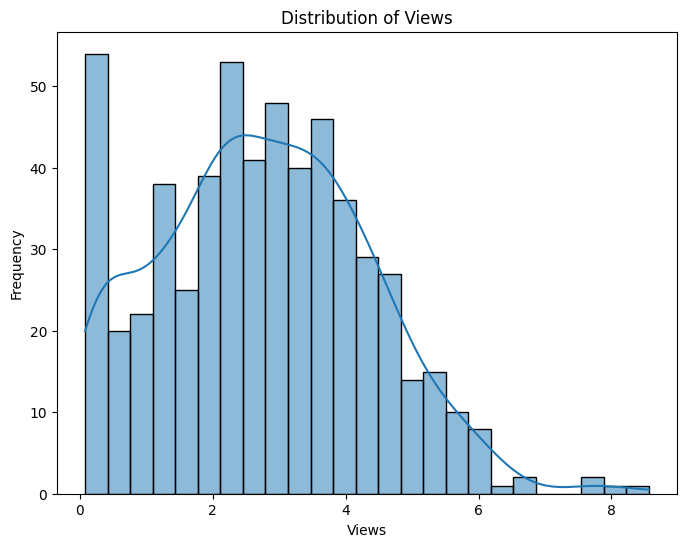

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df['viewership'], bins=25, kde=True)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.show()

The Distribution of Views graph above shows us that the majority of episodes have a low amount of viewership. The frequency gradually declines as the viewership gets higher. This graph indicates a slight right skew due to the lower amounts of episodes at a high viewership.

In [32]:
# Count the number of episodes per season
season_counts = df['season_№'].value_counts().sort_index()

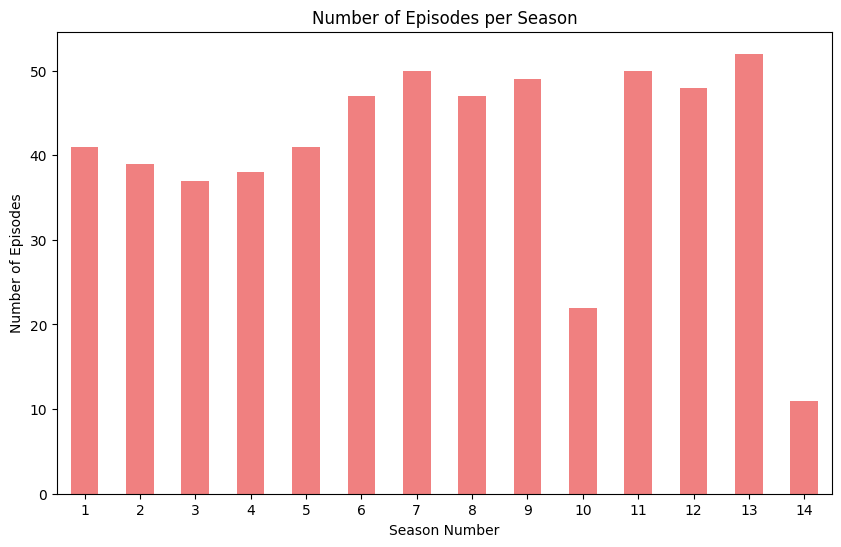

In [33]:
# Plotting the bar plot for episodes per season
plt.figure(figsize=(10, 6))
season_counts.plot(kind='bar', color='lightcoral')
plt.title("Number of Episodes per Season")
plt.xlabel("Season Number")
plt.ylabel("Number of Episodes")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

This graph highlights the variabliity in the number of episodes per seaason. Seasons 7, 11, and 13 have the highest episode counts, while season 10  and 14 have significantly fewer episodes. This could indicate changes in viewership or production strategy over time.

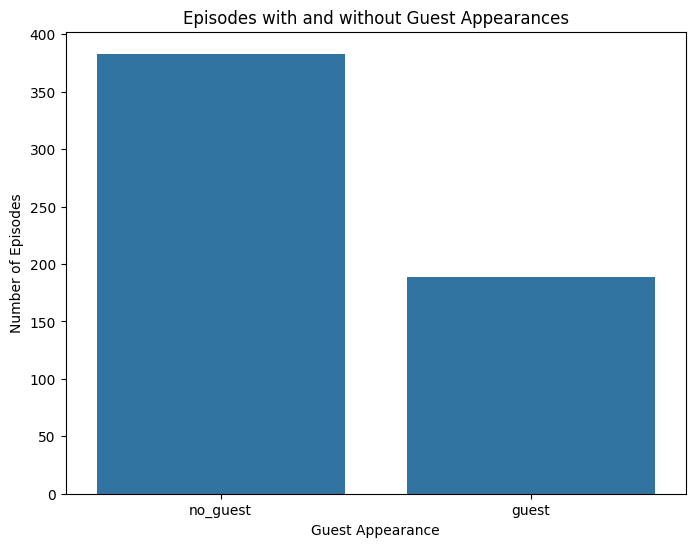

In [34]:
# episodes with guests and without guests
plt.figure(figsize=(8, 6))
sns.countplot(x='guest(s)', data=df, order=['no_guest', 'guest'])
plt.title('Episodes with and without Guest Appearances')
plt.xlabel('Guest Appearance')
plt.ylabel('Number of Episodes')
plt.show()

This graph compares episodes with and without guest appearances. Episodes containing no guests are considerably more common. This suggest that guest appearances are relatively rare in the series. (This could provide the foundation for a future analysis on whether guest appearances impact viewership)

## Bivariate Data Analysis

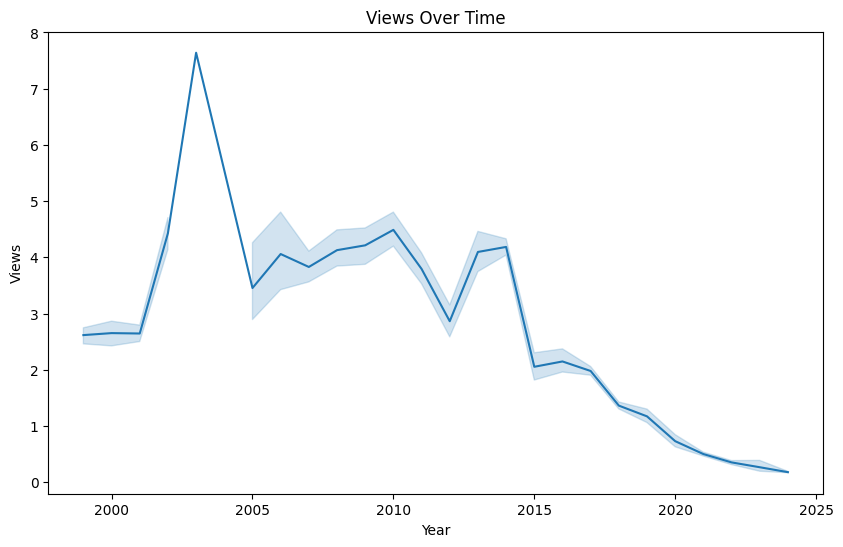

In [36]:
# Viewership over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='viewership', data=df)
plt.title('Views Over Time')
plt.xlabel('Year')
plt.ylabel('Views')
plt.show()

In this depressing graph we see the viewership hit a spike in the beginning and then decline ever since. The highest viewership spike was around the times of 2003-2004. The lowest viewership number was more recent in the years 2020-present. The show has been on a steady decline since the early 2000's indicating a new generation of kids may not watch this show.

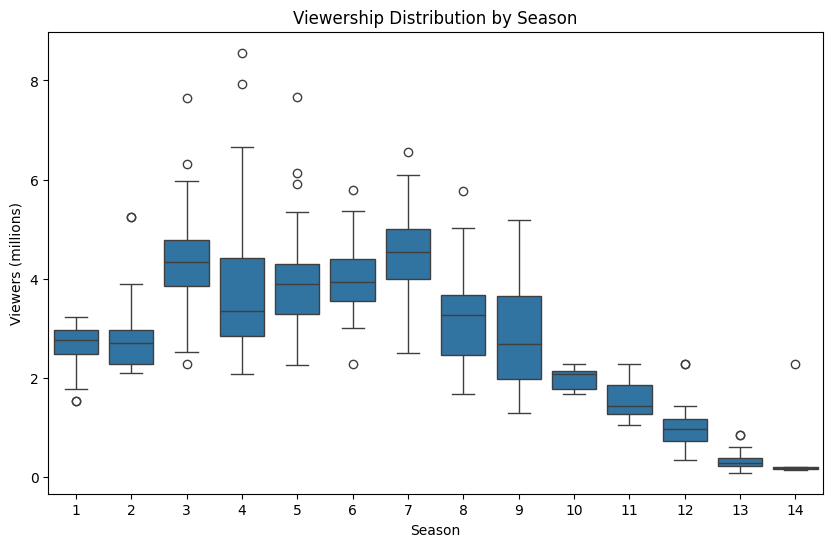

In [37]:
# Viewership by each season
plt.figure(figsize=(10,6))
sns.boxplot(x='season_№', y='viewership', data=df)
plt.title('Viewership Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Viewers (millions)')
plt.show()

This graph looks at the viewership distribution by season, presenting outliers and larger spread of data. Season 4 has the largest spread of data spanning from around 2 million to 7 million with outliers above 8 million viewers. Season 7 appears to have the largest mean viewership with few outliers. Season 10-14 have a steady decline of viewership indicating the lack of new viewers.

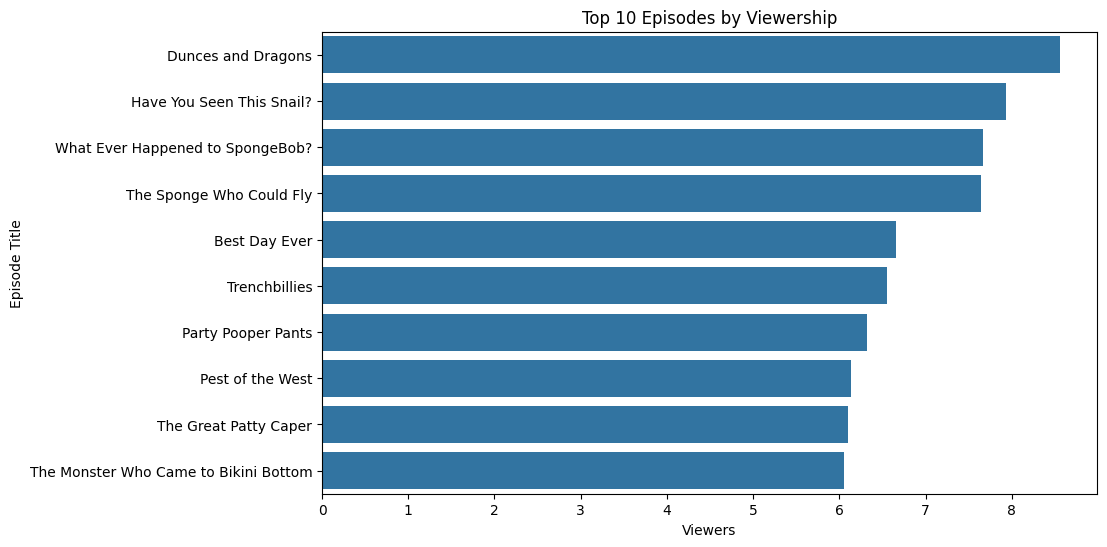

In [35]:
# Top ten episodes based on viewership
top_10 = df.nlargest(10, 'viewership')
plt.figure(figsize=(10,6))
sns.barplot(x='viewership', y='title',data=top_10)
plt.title('Top 10 Episodes by Viewership')
plt.xlabel('Viewers')
plt.ylabel('Episode Title')
plt.show()

This graph shows us the Top 10 Episodes by viewership. The highest viewership episode at 8 million plus was 'Dunces and Dragons' while the lowerst viewership episode at roughly 6 million was 'The Monster Who Came to Bikini Bottom'. No episode in this dataset was below 6 million viewers.

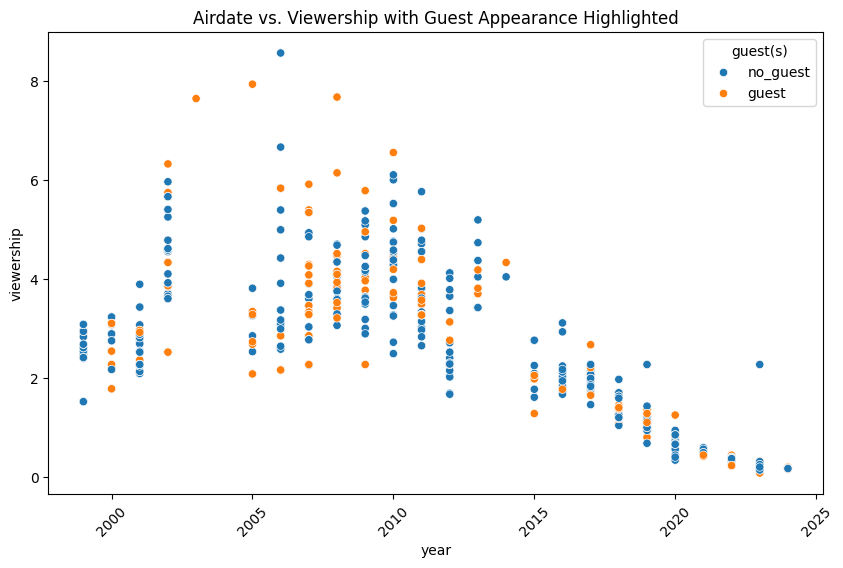

In [38]:
# Viewership with guest appearance
plt.figure(figsize=(10,6))
sns.scatterplot(x='year', y='viewership', hue='guest(s)', data=df)
plt.title('Airdate vs. Viewership with Guest Appearance Highlighted')
plt.xticks(rotation=45)
plt.show()

In this graph we compared the year with viewership, highliting episodes where guests appeared. We can conclude from the graph that guest appearance did not seem to affect the data as the points hardly differ. The span of years from 2005-2010 seem to have highlighted the most guest apearances.

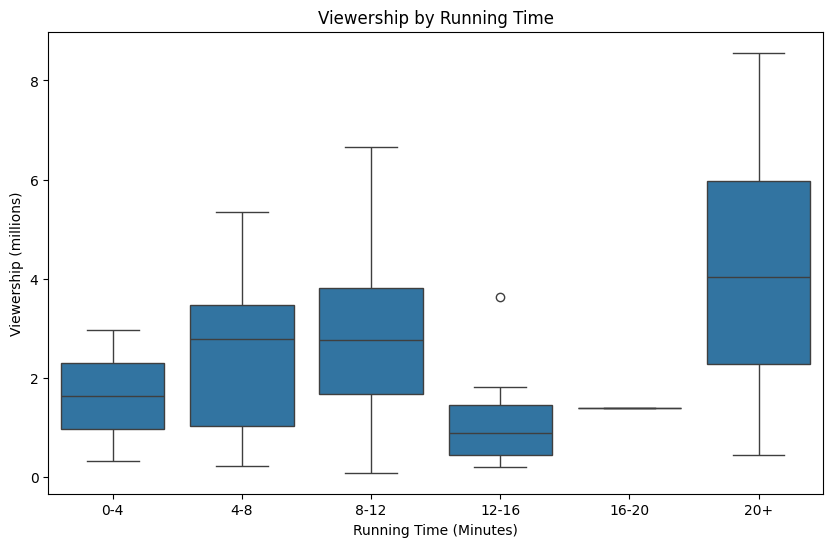

In [39]:
# Viewership by running time
# Create bins for running time categories
bins = [0, 4, 8, 12, 16, 20, float('inf')]
labels = ['0-4', '4-8', '8-12', '12-16', '16-20', '20+']
df['running_time_category'] = pd.cut(df['running_time_minutes'], bins=bins, labels=labels, right=False)

# Now you can plot the viewership by running time category
plt.figure(figsize=(10, 6))
sns.boxplot(x='running_time_category', y='viewership', data=df)
plt.title('Viewership by Running Time')
plt.xlabel('Running Time (Minutes)')
plt.ylabel('Viewership (millions)')
plt.show()

This graph examines viewership by the running time of the episodes. This graph was split into 6 different bins counting by 4's. It appears that episodes with 20 minutes plus have the highest mean viewership and the biggest spread of data. This likely indicates that there are not many values in this column. The value 16-20 has the smallest amount of data and has roughly 1.5 million viewers. 12-16 minutes has the lowest mean value for viewership.

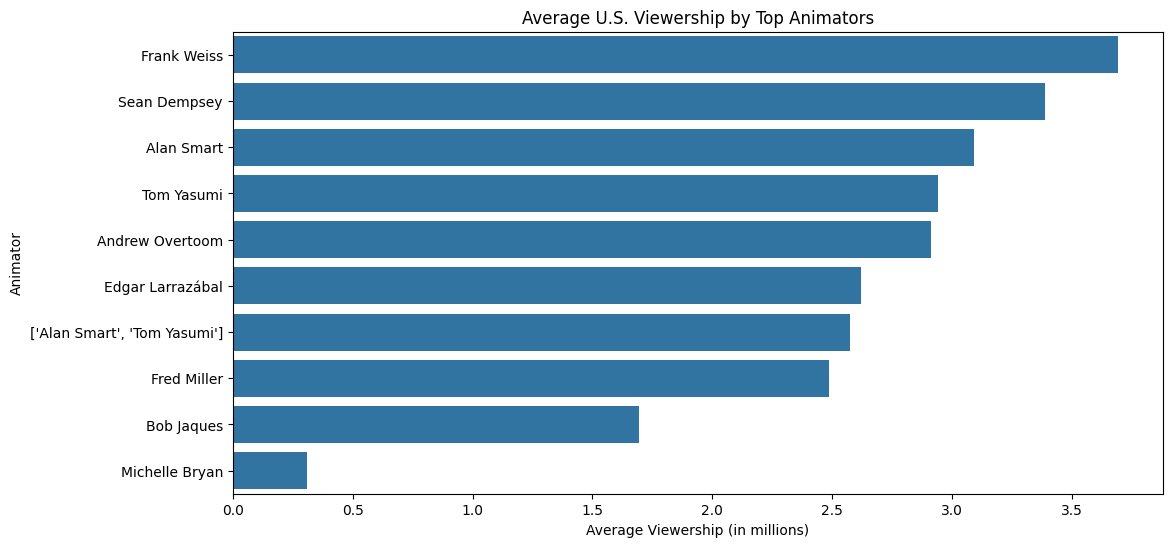

In [40]:
# Define the top animators
top_animators = [
    'Tom Yasumi',
    'Alan Smart',
    'Andrew Overtoom',
    "['Alan Smart', 'Tom Yasumi']",
    'Sean Dempsey',
    'Michelle Bryan',
    'Bob Jaques',
    'Edgar Larrazábal',
    'Frank Weiss',
    'Fred Miller'
]

# Filter the DataFrame for top animators
filtered_df = df[df['animation'].isin(top_animators)]

# Group by animation and calculate the mean views
avg_views_by_top_animation = filtered_df.groupby('animation')['viewership'].mean().reset_index()

# Sort the values for better visualization
avg_views_by_top_animation = avg_views_by_top_animation.sort_values(by='viewership', ascending=False)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x='viewership', y='animation', data=avg_views_by_top_animation)
plt.title('Average U.S. Viewership by Top Animators')
plt.xlabel('Average Viewership (in millions)')
plt.ylabel('Animator')
plt.show()

This graph wanted to analyze if animators contributed to viewership statistics. This graph shows that Frank Weiss has the highest average viewership among the animators while Michelle Bryan has the lowest at <0.5.

In [46]:
# Create a new column to indicate presence of sister episodes
df['Has Sister Episode'] = df['sister_episode(s)'].apply(lambda x: 'No' if x == "no_guest" else 'Yes')

In [48]:
# Calculate mean viewership for each group
viewership_summary = df.groupby('Has Sister Episode')['viewership'].mean().reset_index()

<ipython-input-50-02fa272b4c77>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=viewership_summary, x='Has Sister Episode', y='viewership', palette='cool')


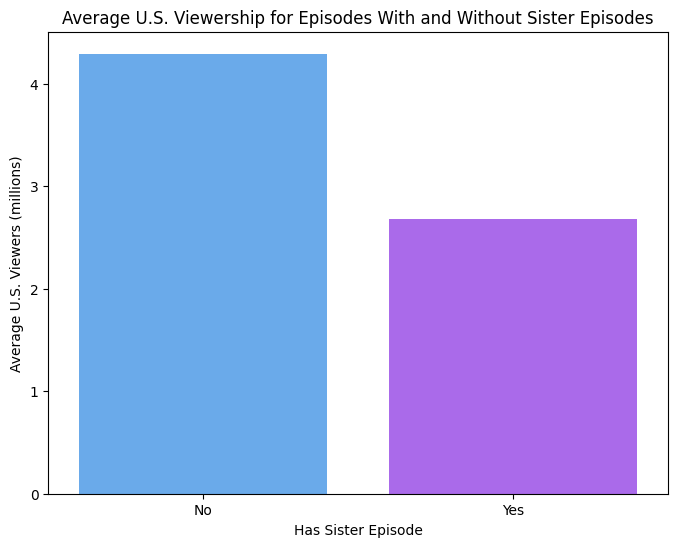

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Bar plot
sns.barplot(data=viewership_summary, x='Has Sister Episode', y='viewership', palette='cool')

# Labeling
plt.title("Average U.S. Viewership for Episodes With and Without Sister Episodes")
plt.xlabel("Has Sister Episode")
plt.ylabel("Average U.S. Viewers (millions)")
plt.show()

This graph compares the average U.S. viewership between episodes that have a sister episode and those that don't. It appears that having a sister episode did not have an affect in gaining viewership as the average values for the 'yes' column are lower than the 'no' column. The average viewership without a sister episode is around 4 million while the column with a sister episode is around 2.5 million.

## Data Dictionary

**airdate**

The original air date of the episode	Date

**animation**

animator used	String

**animation_supervisor**

Supervisor in charge of animation	String

**copyright_year**

Year the episode was copyrighted	Integer

**creative**

Creative director or lead creative for the episode	String

**episode_№**

Episode number within the season	Integer

**guest(s)**

Guest appearances featured in the episode	String

**line_producer**

Line producer responsible for production	String

**main**

Main storyline or characters involved	String

**next**

Title of the following episode	String

**previous**

Title of the previous episode	String

**production_code**

Code assigned for production identification	String

**running_time**

Total duration of the episode in seconds	Integer

**season_№**

Season number in which the episode was released	Integer

**sister_episode(s)**

Episodes aired as sister episodes	String

**storyboard**

Person(s) responsible for storyboarding	String

**storyboard_artist(s)**

Artists involved in creating the storyboard	String

**supervising**

Name of supervising director or producer	String

**supervising_producer(s)**

Producer(s) overseeing production	String

**technical**

Technical director or team responsible	String

**u.s.premiere_time(et)**

Premiere time in Eastern Time (U.S.)	Time

**u.s.viewers(millions)**

Viewership in the U.S. (millions)	Float

**writer(s)**

Writer(s) credited for the episode	String

**characters**

List of characters featured	String

**title**

Episode title	String


## Conclusion

The analysis of the SpongeBob SquarePants episodes reveals notable trends in viewership patterns and characteristics of the show. The distribution of views indicates that most episodes attract a relatively low audience, with a gradual decline in frequency as viewership increases. This suggests a slight right skew. The number of episodes per season varies significantly, with seasons 7, 11, and 13 featuring the most episodes, while seasons 10 and 14 have fewer, hinting at shifts in production strategies or viewer engagement. Episodes without guest appearances are far more common, which poses questions for further exploration into the impact of guests on viewership. The top-performing episode, "Dunces and Dragons," demonstrates that even the most popular episodes don’t exceed 8 million viewers. A notable decline in viewership since the early 2000s points to a potential decrease in relevance for newer generations. The distribution of viewership by season highlights a significant spread of data, with season 4 showing the widest range. The comparison of average viewership between episodes that have a sister episode and those that don't indicates that having a sister episode did not positively affect viewership. The average values for the 'Yes' column are lower than those for the 'No' column. The average viewership without a sister episode is around 4 million, while the average for episodes with a sister episode is approximately 2.5 million. This suggests that, contrary to expectations, sister episodes may not significantly impact viewership numbers. Additionally, the analysis of running time suggests that longer episodes tend to attract higher viewership. Finally, the animator analysis reveals that Frank Weiss has the highest average viewership, suggesting that the choice of animator may have a subtle influence on audience engagement. Overall, these insights reflect the complexities of viewership dynamics and help pose new questions for future analyses of audience preferences and trends in animated television.

## Questions For Further Study

How do different animators and their styles impact the overall viewer engagement?


What other external factors might influence the viewership of specific episodes (e.g., marketing, competition from other shows)?

If demographic data were available, how might different audience segments (age, gender, etc.) influence viewership trends for various episodes?

How do SpongeBob’s viewership trends compare to those of other popular animated shows from the same era?